<a href="https://colab.research.google.com/github/CalculatedContent/WeightWatcher/blob/master/examples/WW-GPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeightWatcher - GPT

This notebook reproduces Figure 6(b) from our [Nature paper](https://www.nature.com/articles/s41467-021-24025-8)

It compares the distribution of layer PL Alpha $\alpha$ metrics for the the GPT and GPT2 pretrained models


And discussed on the [CalculatedContent Blog](https://calculatedcontent.com/2021/07/09/how-to-tell-if-you-have-trained-your-model-with-enough-data/)



In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Import WeightWatcher


In [ ]:
import sys
if 'google.colab' in sys.modules:
    !pip install transformers weightwatcher

In [2]:
import torch
import weightwatcher as ww
torch.__version__, ww.__version__

('1.6.0', '0.6.5')

In [3]:
import transformers
from transformers import OpenAIGPTModel,GPT2Model

INFO:transformers.file_utils:PyTorch version 1.6.0 available.
INFO:transformers.file_utils:TensorFlow version 2.1.0 available.


In [4]:
gpt_model = OpenAIGPTModel.from_pretrained('openai-gpt')
gpt_model.eval();

gpt2_model = GPT2Model.from_pretrained('gpt2')
gpt2_model.eval();

INFO:transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/openai-gpt-config.json from cache at /Users/charleshmartin/.cache/torch/transformers/a27bb7c70e9002d7558d2682d5a95f3c0a8b31034616309459e0b51ef07ade09.bd0797be126548711309ad2174d2afb16e3c37e891707667603d85e35a4ad001
INFO:transformers.configuration_utils:Model config OpenAIGPTConfig {
  "_num_labels": 2,
  "afn": "gelu",
  "architectures": [
    "OpenAIGPTLMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": null,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "embd_pdrop": 0.1,
  "eos_token_id": null,
  "finetuning_task": null,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "is_decoder": false,
  "is_encoder_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_epsilon": 1e-05,
  "length_penalty": 1.0,
  "max_length": 20,
  "min_length": 0,
  "model_type":

In [5]:
watcher = ww.WeightWatcher(model=gpt_model)
gpt_details = watcher.analyze()

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img


In [6]:
watcher = ww.WeightWatcher(model=gpt2_model)
gpt2_details = watcher.analyze()

INFO:weightwatcher:

python      version 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy       version 1.19.1
tensforflow version 2.1.0
keras       version 2.2.4-tf
INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'conv2d_fft': False, 'ww2x': False, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'full_svd', 'fix_fingers': False, 'fit': 'power_law', 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 50, 'max_evals': 10000, 'tolerance': 1e-06, 'glorot_fit': False, 'layers': []}
INFO:weightwatcher:Saving all images to ww-img


In [7]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7,5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

Text(0.5, 0, 'alpha $(\\alpha)$ PL exponent')

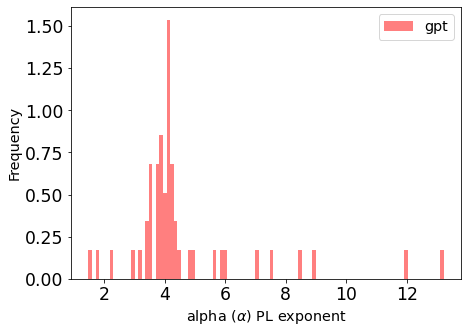

In [8]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
plt.legend()
plt.xlabel(r"alpha $(\alpha)$ PL exponent")

Text(0.5, 0, 'alpha $(\\alpha)$ PL exponent')

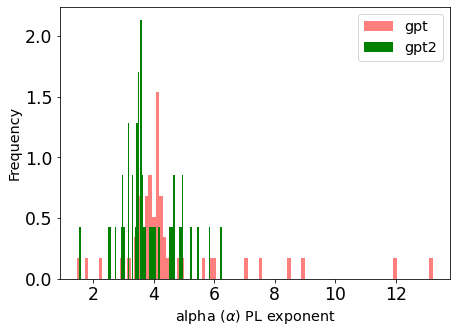

In [9]:
gpt_details.alpha.plot.hist(bins=100, color='red', alpha=0.5, density=True, label='gpt')
gpt2_details.alpha.plot.hist(bins=100, color='green', density=True, label='gpt2')
plt.legend()
plt.xlabel(r"alpha $(\alpha)$ PL exponent")